# Star Classification

In this project, I aim to leverage the power of the Morgan-Keenan model to build a classification model that distinguishes between two main stellar classes: giants and dwarfs. The dataset used contains various features derived from astronomical observations.

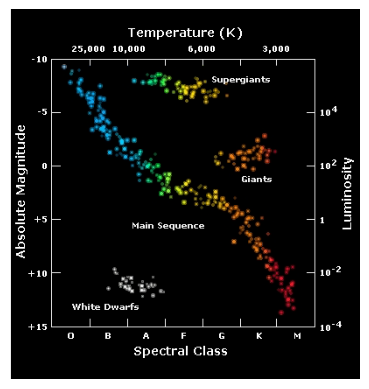

In [183]:
image_path = 'stars.png'
img = imread(image_path)

plt.imshow(img)
plt.axis('off') 
plt.show()


In [178]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, balanced_accuracy_score, classification_report
import matplotlib.pyplot as plt
from matplotlib.image import imread


In [64]:
zip_file_path = 'archive (7).zip'

extracted_folder = 'stars'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

extracted_files = os.listdir(extracted_folder)
print("Contains:", extracted_files)

Contains: ['6 class csv.csv', 'Star3642_balanced.csv', 'Star39552_balanced.csv', 'Star99999_raw.csv', 'Star9999_raw.csv']


In [65]:
csv_file_path = os.path.join(extracted_folder, 'Star99999_raw.csv')
df = pd.read_csv(csv_file_path)

df.head()

,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
0,0,9.10,3.54,1.39,0.482,F5
1,1,9.27,21.90,3.10,0.999,K3V
2,2,6.61,2.81,0.63,-0.019,B9
3,3,8.06,7.75,0.97,0.370,F0V
4,4,8.55,2.87,1.11,0.902,G8III


double index


In [66]:
print("Train shape: ",df.shape)

Train shape:  (99999, 6)


## Data preparation


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  99999 non-null  int64 
 1   Vmag        99999 non-null  object
 2   Plx         99999 non-null  object
 3   e_Plx       99999 non-null  object
 4   B-V         99999 non-null  object
 5   SpType      97377 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


convert columns to numeric


In [68]:
df.isnull().sum()

Unnamed: 0       0
Vmag             0
Plx              0
e_Plx            0
B-V              0
SpType        2622
dtype: int64

In [69]:
df.describe()

,Unnamed: 0
count,99999.000000
mean,49999.000000
std,28867.369122
min,0.000000
25%,24999.500000
50%,49999.000000
75%,74998.500000
max,99998.000000


In [70]:
df.columns

Index(['Unnamed: 0', 'Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType'], dtype='object')

deleting white spaces

In [71]:
df["Vmag"] = pd.to_numeric(df["Vmag"], downcast="float", errors='coerce')
df["Plx"] = pd.to_numeric(df["Plx"], downcast="float", errors='coerce')
df["e_Plx"] = pd.to_numeric(df["e_Plx"], downcast="float", errors='coerce')
df["B-V"] = pd.to_numeric(df["B-V"], downcast="float", errors='coerce')

In [72]:
df.describe(include='all')

,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
count,99999.000000,99998.000000,99768.000000,99768.000000,98871.000000,97377
unique,NaN,NaN,NaN,NaN,NaN,3756
top,NaN,NaN,NaN,NaN,NaN,K0
freq,NaN,NaN,NaN,NaN,NaN,7355
mean,49999.000000,8.369723,7.212443,1.365389,0.704728,NaN
std,28867.369122,1.313881,11.349038,1.816845,0.489686,NaN
min,0.000000,-1.440000,-54.950001,0.380000,-0.400000,NaN
25%,24999.500000,7.640000,2.510000,0.880000,0.348000,NaN
50%,49999.000000,8.440000,4.630000,1.100000,0.612000,NaN
75%,74998.500000,9.140000,8.410000,1.390000,1.075000,NaN


In [73]:
df.isnull().sum()

Unnamed: 0       0
Vmag             1
Plx            231
e_Plx          231
B-V           1128
SpType        2622
dtype: int64

In [74]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)
print("Percentage Missing:", "{:.2%}".format(percent_missing))

Percentage Missing: 0.70%


drop missing data


In [75]:
df_dropped = df.dropna() 

df_dropped
rows_count = df.shape[0]-df_dropped.shape[0]
percent_dropped = rows_count/df.shape[0]
print("Percentage Loss:", "{:.2%}".format(percent_dropped))

Percentage Loss: 3.26%


dropping uselles column

In [76]:
df_dropped = df_dropped.drop('Unnamed: 0', axis=1)

In [77]:
df_dropped.head()

,Vmag,Plx,e_Plx,B-V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III


In [78]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96742 entries, 0 to 99998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    96742 non-null  float32
 1   Plx     96742 non-null  float32
 2   e_Plx   96742 non-null  float32
 3   B-V     96742 non-null  float32
 4   SpType  96742 non-null  object 
dtypes: float32(4), object(1)
memory usage: 3.0+ MB


reindex df because of 0 to 99998 number of entries

In [79]:
df_reindex = df_dropped.reset_index(drop=True)
df_reindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96742 entries, 0 to 96741
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    96742 non-null  float32
 1   Plx     96742 non-null  float32
 2   e_Plx   96742 non-null  float32
 3   B-V     96742 non-null  float32
 4   SpType  96742 non-null  object 
dtypes: float32(4), object(1)
memory usage: 2.2+ MB


We need to prepare df to apply equation because getting 0 in Plx would lead to infinity

In [80]:
df = df_reindex
df = df[df.Plx != 0]
df = df.reset_index(drop=True)

df.head()

,Vmag,Plx,e_Plx,B-V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III


We need to create variable Amag (it contains info about absolute magnitude of stars) via equation M = m + 5(log10p + 1)

M - absolute magnitude

m - visual apparent magnitude

p - stellar parallax (Plx)


implementing equation to find Amag

In [81]:
df["Amag"] = df["Vmag"] + 5* (np.log10(abs(df["Plx"]))+1)

df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,9.10,3.54,1.39,0.482,F5,16.845016
1,9.27,21.90,3.10,0.999,K3V,20.972221
2,6.61,2.81,0.63,-0.019,B9,13.853531
3,8.06,7.75,0.97,0.370,F0V,17.506508
4,8.55,2.87,1.11,0.902,G8III,15.839410


we will classify this dataset via Morgan-Keenan classification system whitch tells us about star size. that's why we are gonna create other column "Target" with stars assigned either as a dwarf and as a giant. 

convert SpType to Target

In [82]:
df['Target'] = df['SpType']

*image Hertzsprung_Russel diagram*

now we assign with roman numeral (took from the SpType) star type

In [83]:
for i in range(len(df['Target'])):
    if "V" in df.loc[i,'Target']: 
        if "VII" in df.loc[i,'Target']: 
            df.loc[i,'Target'] = 0 # VII Dwarf
        else:
            df.loc[i,'Target'] = 1 # IV, V, VI  Giant
    elif "I" in df.loc[i,'Target']: 
        df.loc[i,'Target'] = 0 # I, II, III Dwarf
    else: 
        df.loc[i,'Target'] = 9 # None

In [84]:
df['Target']

0        9
1        1
2        9
3        1
4        0
        ..
96702    9
96703    9
96704    9
96705    1
96706    0
Name: Target, Length: 96707, dtype: object

0 is dwarf, 1 is giant 9 is none of them

balancing data

In [85]:
df.describe(include='all')


,Vmag,Plx,e_Plx,B-V,SpType,Amag,Target
count,96707.000000,96707.000000,96707.000000,96707.000000,96707,96707.000000,96707.0
unique,NaN,NaN,NaN,NaN,3703,NaN,3.0
top,NaN,NaN,NaN,NaN,K0,NaN,9.0
freq,NaN,NaN,NaN,NaN,7321,NaN,49210.0
mean,8.291726,7.107774,1.264157,0.700665,NaN,16.481201,NaN
std,1.247959,11.146887,1.156420,0.490008,NaN,2.451195,NaN
min,-1.440000,-35.099998,0.380000,-0.400000,NaN,-0.350000,NaN
25%,7.610000,2.520000,0.870000,0.342000,NaN,15.157670,NaN
50%,8.400000,4.600000,1.080000,0.605000,NaN,16.447716,NaN
75%,9.070000,8.270000,1.360000,1.072000,NaN,18.016191,NaN


In [86]:
df['Target'].value_counts()

Target
9    49210
1    27721
0    19776
Name: count, dtype: int64

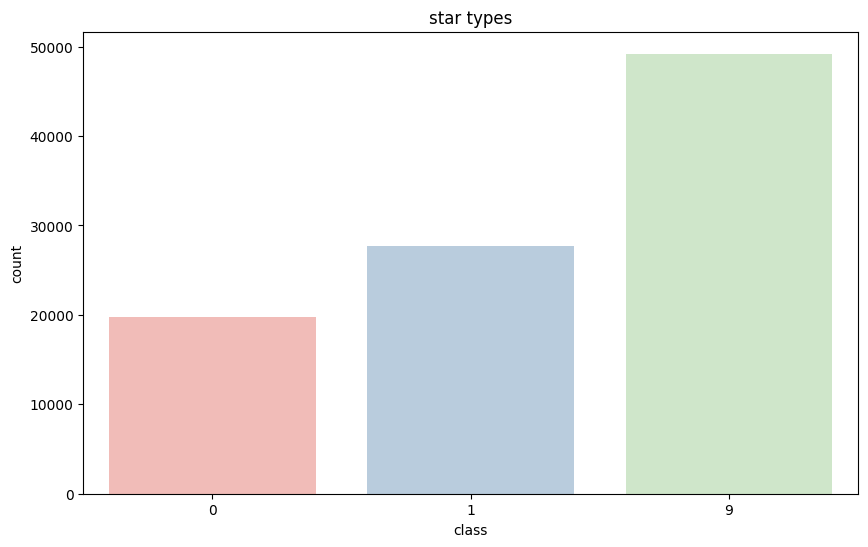

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Target'].value_counts().index, y=df['Target'].value_counts(), palette='Pastel1')
plt.title('star types')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

0 - dwarf 1 - giants 9 - else cosmic stuff, even black holes (this model will be continued . .)

In [88]:
df = df[df.Target != 9]

In [89]:
df['Target'].value_counts()

Target
1    27721
0    19776
Name: count, dtype: int64

In [90]:
df_giants = df[df.Target == 1]
df_dwarfs = df[df.Target == 0]

num_g = df_giants.shape[0]
num_d = df_dwarfs.shape[0]
print("Giants:",num_g)
print("Dwarfs:",num_d)

Giants: 27721
Dwarfs: 19776


downsampling the majority class


In [91]:
df_giants_downsampled = resample(df_giants, replace=False, n_samples=num_d,    
                                 random_state=1) 
 
df_downsampled = pd.concat([df_giants_downsampled, df_dwarfs])

In [92]:
df_downsampled['Target'].value_counts()


Target
1    19776
0    19776
Name: count, dtype: int64

In [93]:
df_downsampled.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,Target
6959,9.03,3.650000,1.01,1.146,K2III/IVCN.,16.841465,1
15445,7.88,31.879999,0.98,0.716,G8V,20.397591,1
4771,9.29,5.160000,1.35,0.400,F0V,17.853249,1
26019,7.51,12.850000,0.84,0.541,F7V,18.054516,1
9028,9.10,6.190000,3.26,0.484,F3:V+...,18.058453,1


using method smple to maintain joining 2 df s

In [94]:
df_balanced = df_downsampled.reset_index(drop=True)
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

df_balanced

,Vmag,Plx,e_Plx,B-V,SpType,Amag,Target
0,7.60,1.94,0.55,-0.005,B7IV/V,14.039009,1
1,8.99,6.51,0.86,0.561,F7V,18.057905,1
2,8.86,7.46,1.12,0.605,F8V,18.223694,1
3,7.60,6.26,0.97,0.127,A2IV,16.582872,1
4,7.68,6.54,1.14,0.939,G5IV,16.757889,1
...,...,...,...,...,...,...,...
39547,8.11,10.33,0.85,0.492,F7V,18.180500,1
39548,7.52,4.99,0.95,0.998,G8III,16.010504,0
39549,7.16,4.85,0.80,1.000,K0IIICN...,15.588708,0
39550,5.01,3.72,0.48,1.304,K1/K2II,12.862715,0



### Dataset now contains following variables

Vmag: Visual Apparent Magnitude of the Star

Plx : Distance Between the Star and the Earth

e_Plx:Standard Error of Plx 

B-V : B-V color index. 

SpType: Spectral type

Amag: Absolute Magnitude of the Star

TargetClass: Dwarf or Giant

In [95]:
data = df_balanced.copy()

In [96]:
data.shape

(39552, 7)

In [97]:
data['Target'].value_counts()

Target
1    19776
0    19776
Name: count, dtype: int64

In [98]:
data.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,Target
0,7.60,1.94,0.55,-0.005,B7IV/V,14.039009,1
1,8.99,6.51,0.86,0.561,F7V,18.057905,1
2,8.86,7.46,1.12,0.605,F8V,18.223694,1
3,7.60,6.26,0.97,0.127,A2IV,16.582872,1
4,7.68,6.54,1.14,0.939,G5IV,16.757889,1


outliers detection

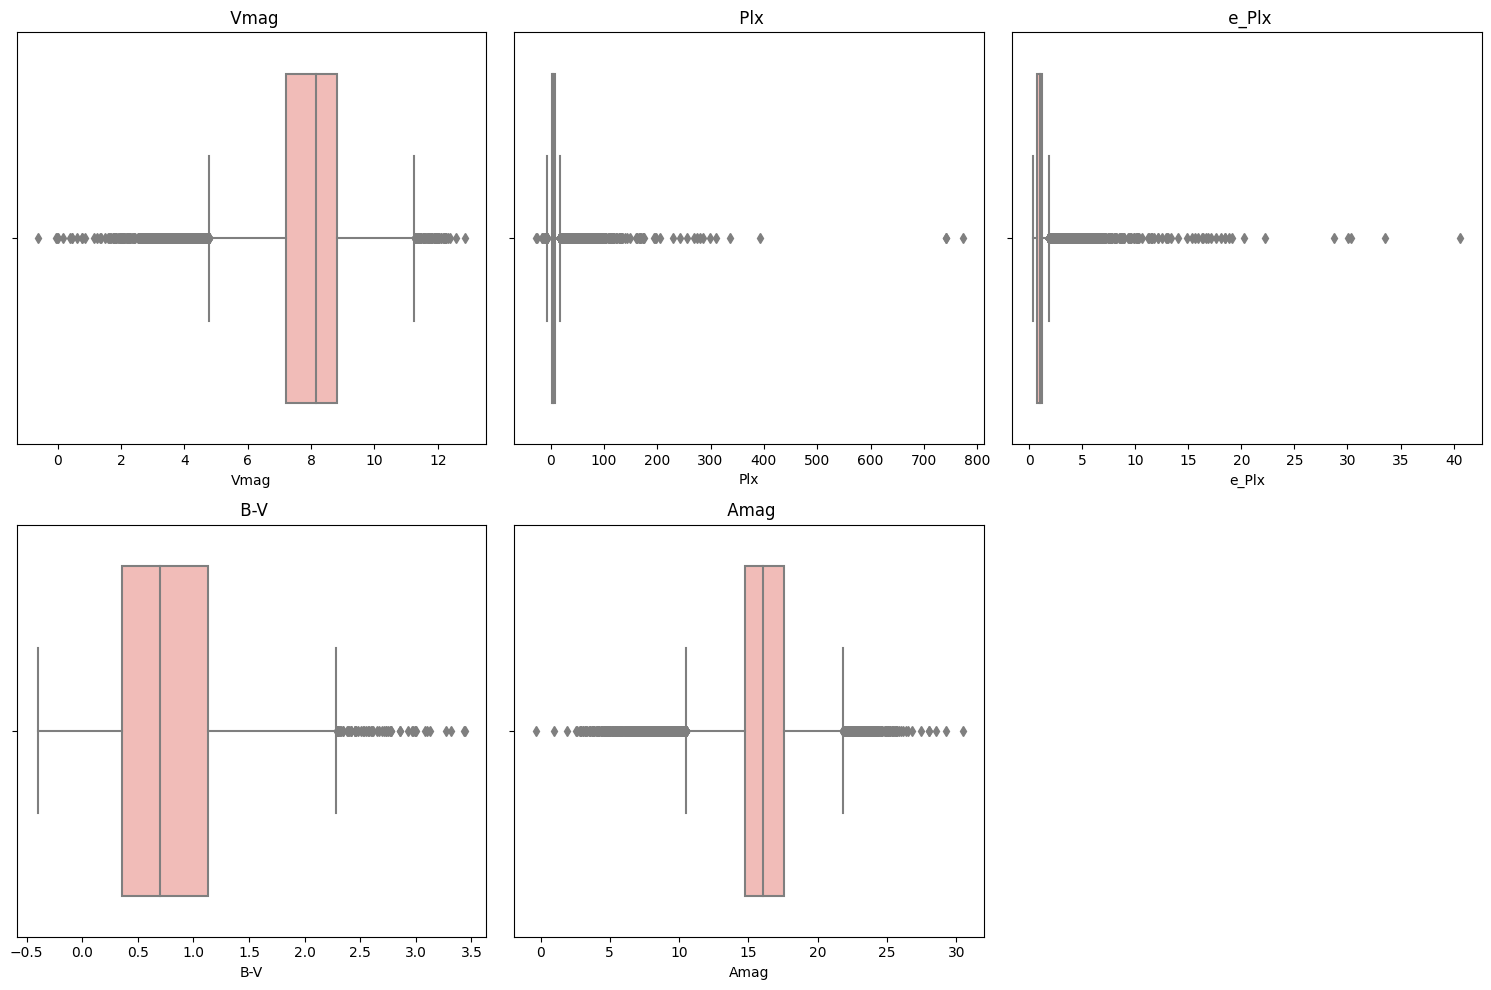

In [99]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x=data['Vmag'], palette='Pastel1')
plt.title(' Vmag')

plt.subplot(2, 3, 2)
sns.boxplot(x=data['Plx'], palette='Pastel1')
plt.title(' Plx')

plt.subplot(2, 3, 3)
sns.boxplot(x=data['e_Plx'], palette='Pastel1')
plt.title(' e_Plx')

plt.subplot(2, 3, 4)
sns.boxplot(x=data['B-V'], palette='Pastel1')
plt.title(' B-V')

plt.subplot(2, 3, 5)
sns.boxplot(x=data['Amag'], palette='Pastel1')
plt.title(' Amag')

plt.tight_layout()
plt.show()

In [100]:
data=data[data['Vmag']<data['Vmag'].quantile(0.9)]
data=data[data['Plx']<data['Plx'].quantile(0.9)]
data=data[data['e_Plx']<data['e_Plx'].quantile(0.9)]
data=data[data['B-V']<data['B-V'].quantile(0.9)]
data=data[data['Amag']<data['Amag'].quantile(0.9)]

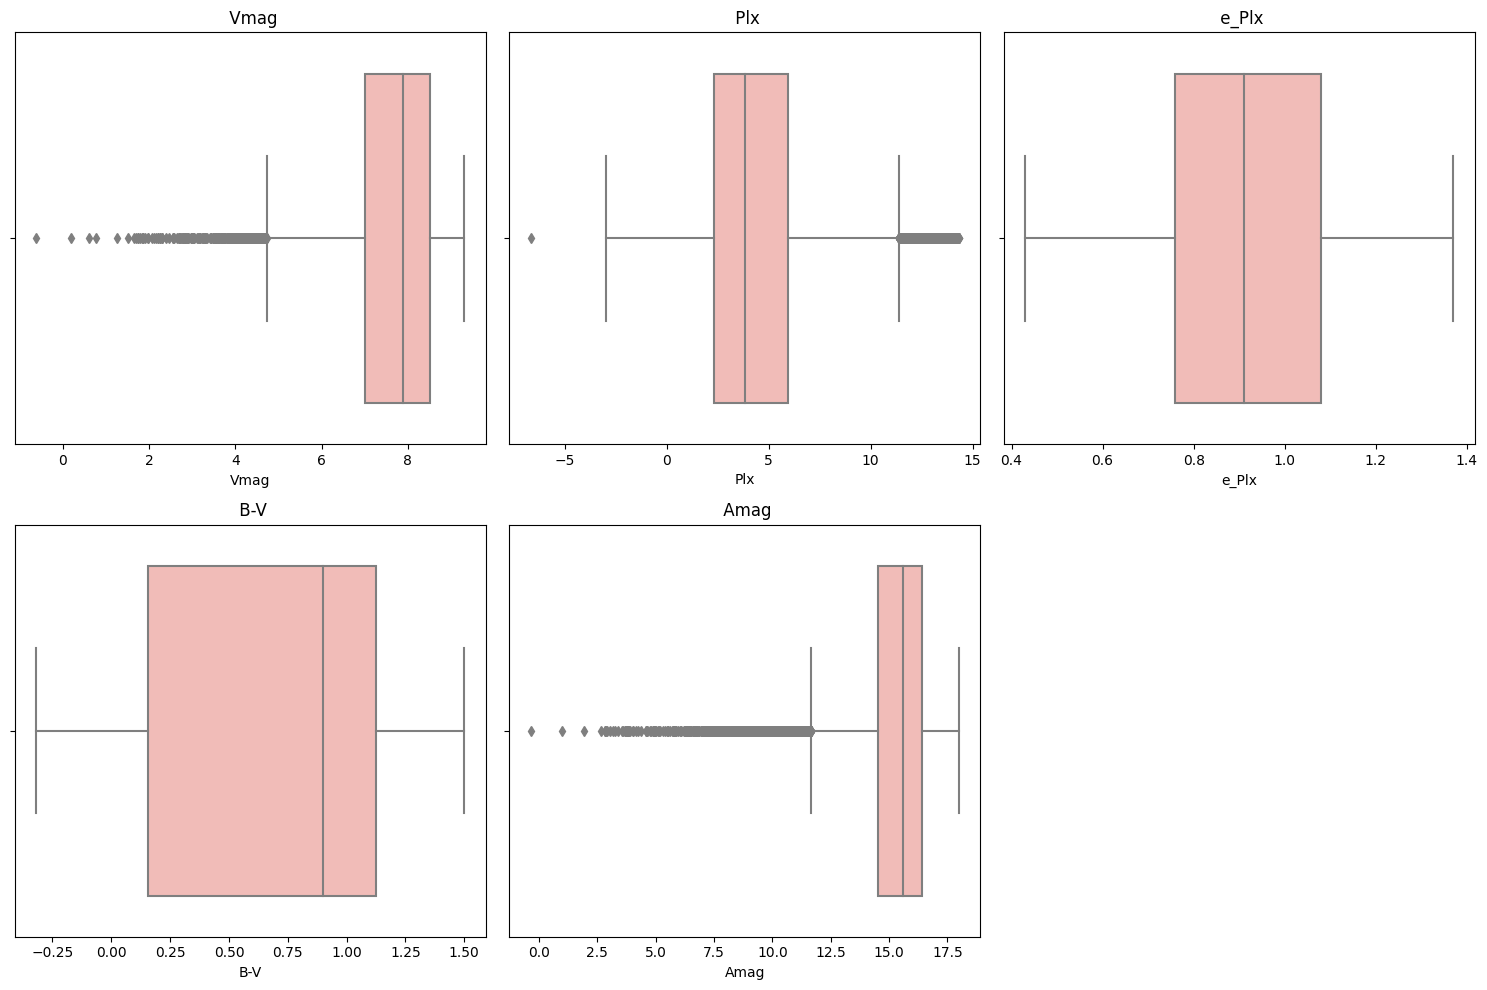

In [101]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x=data['Vmag'], palette='Pastel1')
plt.title(' Vmag')

plt.subplot(2, 3, 2)
sns.boxplot(x=data['Plx'], palette='Pastel1')
plt.title(' Plx')

plt.subplot(2, 3, 3)
sns.boxplot(x=data['e_Plx'], palette='Pastel1')
plt.title(' e_Plx')

plt.subplot(2, 3, 4)
sns.boxplot(x=data['B-V'], palette='Pastel1')
plt.title(' B-V')

plt.subplot(2, 3, 5)
sns.boxplot(x=data['Amag'], palette='Pastel1')
plt.title(' Amag')

plt.tight_layout()
plt.show()

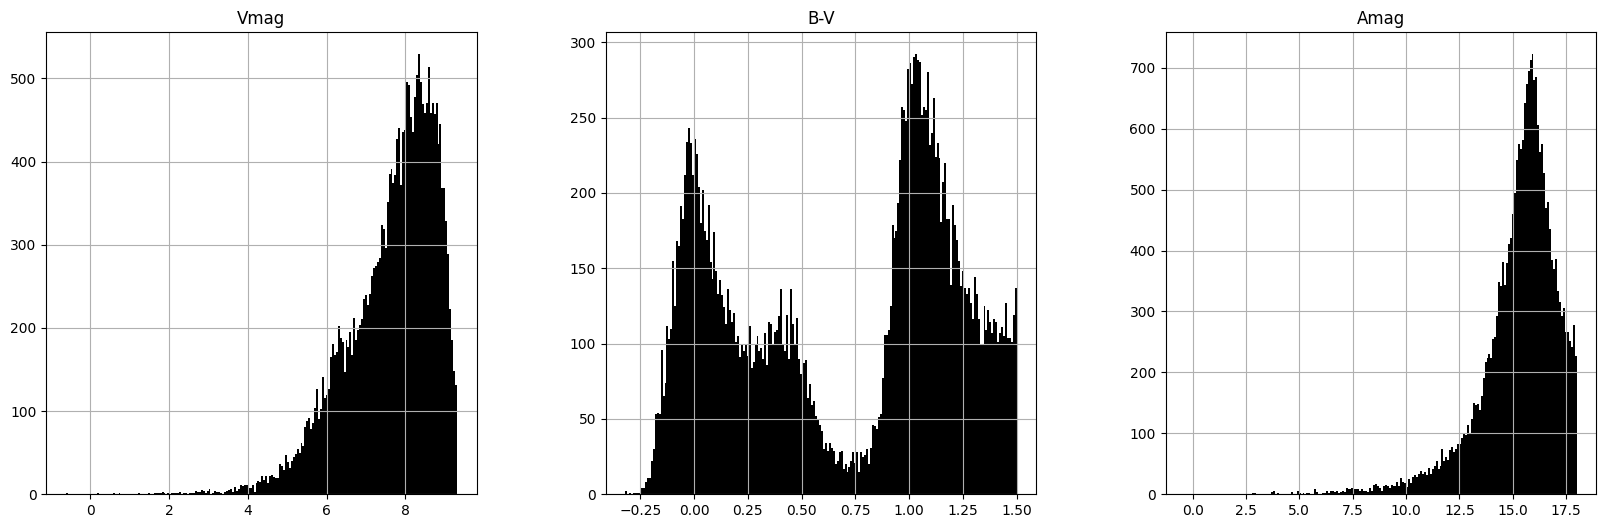

In [200]:
data[["Vmag", "B-V", "Amag"]].hist(figsize = (20,6), color = "black", bins =  200, layout = (1,3))
plt.show()

In [113]:
data.shape

(23294, 7)

In [114]:
SpType_le = LabelEncoder()  
data['SpType'] = SpType_le.fit_transform(data["SpType"])
       

In [118]:
data['SpType']

0         688
3         108
4        1225
5        1542
6        1339
         ... 
39546    1542
39548    1330
39549    1435
39550    1458
39551    1539
Name: SpType, Length: 23294, dtype: int32

In [115]:
x = data.drop("Target", axis = 1).values
y = data['Target'].values 

In [125]:
x_train,x_test ,y_train,y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)
x_train.shape


(17470, 6)

In [144]:
unique_labels = list(set(y_train))
print("Unique label type:", unique_labels)

Unique label type: [0, 1]


we need to encode y sets in order to switch stars marking to binary variables

In [121]:
label_encoder_target = LabelEncoder()
y_train_encoded = label_encoder_target.fit_transform(y_train)
print("y_train_encoded:", y_train_encoded.shape)
print("Unikalne etykiety:", label_encoder_target.classes_)
print("Typ danych w y_train_encoded:", y_train_encoded.dtype)

Wymiar y_train_encoded: (17470,)
Unikalne etykiety: [0 1]
Typ danych w y_train_encoded: int32


In [137]:
label_encoder_target = LabelEncoder()
y_test_encoded = label_encoder_target.fit_transform(y_test)
print("y_train_encoded:", y_test_encoded.shape)
print("Unikalne etykiety:", label_encoder_target.classes_)
print("Typ danych w y_train_encoded:", y_test_encoded.dtype)

Wymiar y_train_encoded: (5824,)
Unikalne etykiety: [0 1]
Typ danych w y_train_encoded: int32


# Models

## KNN

In [161]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train , y_train_encoded)

knn_pred = knn.predict(x_test)
balanced_acc = balanced_accuracy_score(y_test_encoded, knn_pred)


print("Balanced Accuracy:", balanced_acc)
print(knn.score(x_train , y_train_encoded))
print(classification_report(y_test_encoded, knn_pred))

Balanced Accuracy: 0.9646658101763735
0.9743560389238695
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3552
           1       0.95      0.96      0.96      2272

    accuracy                           0.97      5824
   macro avg       0.96      0.96      0.96      5824
weighted avg       0.97      0.97      0.97      5824



In [189]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

grid_search = GridSearchCV(knn, param_grid, scoring=make_scorer(balanced_accuracy_score), cv=5)
grid_search.fit(x_train, y_train_encoded)

print("Best parameters:", grid_search.best_params_)

knng_pred = grid_search.predict(x_test)

print(classification_report(y_test_encoded, knng_pred))
balanced_acc_knn = balanced_accuracy_score(y_test_encoded, knng_pred)
print("Balanced Accuracy:", balanced_acc_knn)

Best parameters: {'n_neighbors': 3, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3552
           1       0.95      0.97      0.96      2272

    accuracy                           0.97      5824
   macro avg       0.97      0.97      0.97      5824
weighted avg       0.97      0.97      0.97      5824

Balanced Accuracy: 0.9710557828955716


## Random Forest

In [162]:
rf = RandomForestClassifier(max_features=6 ,    max_depth=20)
rf.fit(x_train , y_train_encoded)

rf_pred = rf.predict(x_test)
balanced_acc = balanced_accuracy_score(y_test_encoded, rf_pred)


print("Balanced Accuracy:", balanced_acc)
print(rf.score(x_train , y_train_encoded))
print(classification_report(y_test_encoded, rf_pred))

Balanced Accuracy: 0.9531626697119655
0.9987406983400114
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3552
           1       0.94      0.95      0.94      2272

    accuracy                           0.95      5824
   macro avg       0.95      0.95      0.95      5824
weighted avg       0.95      0.95      0.95      5824



In [190]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'max_features': [3, 6, 9]
}

grid_search = GridSearchCV(rf, param_grid, scoring=make_scorer(balanced_accuracy_score), cv=5)

grid_search.fit(x_train, y_train_encoded)
print("Best parameters:", grid_search.best_params_)
rf_pred = grid_search.predict(x_test)


print(classification_report(y_test_encoded, rf_pred))
balanced_acc_rf = balanced_accuracy_score(y_test_encoded, rf_pred)
print("Balanced Accuracy:", balanced_acc_rf)

Best parameters: {'max_depth': 20, 'max_features': 6, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3552
           1       0.94      0.95      0.94      2272

    accuracy                           0.96      5824
   macro avg       0.95      0.95      0.95      5824
weighted avg       0.96      0.96      0.96      5824

Balanced Accuracy: 0.9546238580129425


## Decision Tree



In [163]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(x_train,y_train_encoded)

dt_pred = dt_model.predict(x_test)


print("Balanced Accuracy:", balanced_acc)
print(classification_report(y_test_encoded, dt_pred))

Balanced Accuracy: 0.9531626697119655
0.9411057692307693
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3552
           1       0.93      0.92      0.92      2272

    accuracy                           0.94      5824
   macro avg       0.94      0.94      0.94      5824
weighted avg       0.94      0.94      0.94      5824



In [188]:
dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_model, param_grid, scoring=make_scorer(balanced_accuracy_score), cv=5)

grid_search.fit(x_train, y_train_encoded)

print("Best parameters:", grid_search.best_params_)

dtg_pred = grid_search.predict(x_test)
print("Classification Report:")
print(classification_report(y_test_encoded, dtg_pred))
balanced_acc_dt = balanced_accuracy_score(y_test_encoded, dtg_pred)
print("Balanced Accuracy:", balanced_acc_dt)

Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3552
           1       0.93      0.94      0.93      2272

    accuracy                           0.95      5824
   macro avg       0.95      0.95      0.95      5824
weighted avg       0.95      0.95      0.95      5824

Balanced Accuracy: 0.9469313063063063


## Model overview

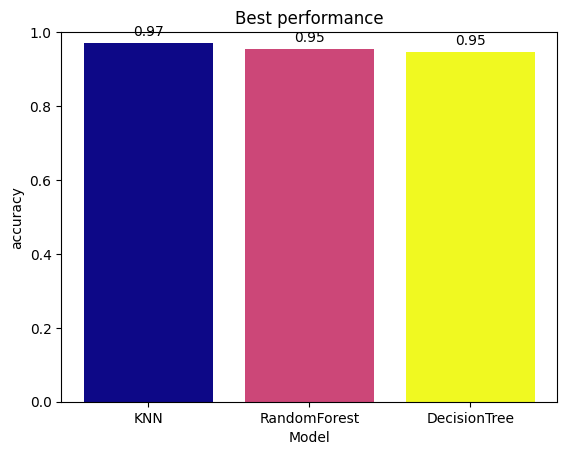

In [197]:
models = ['KNN', 'RandomForest', 'DecisionTree']

results = [balanced_acc_knn, balanced_acc_rf, balanced_acc_dt]

plt.bar(models, results, color=plt.cm.plasma(np.linspace(0, 1, len(models))))
plt.title('Best performance')
plt.xlabel('Model')
plt.ylabel('accuracy')
plt.ylim(0, 1)  

for i in range(len(models)):
    plt.text(i, results[i] + 0.01, f'{results[i]:.2f}', ha='center', va='bottom')

plt.show()

## Test

In [199]:
knn.fit(x_train, y_train_encoded)

knn.score(x_test , y_test_encoded)

0.9653159340659341